In [1]:
import os
import sys
import numpy as np
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision.transforms as tf

base_dir = os.path.dirname(os.getcwd())
sys.path.append(base_dir)

from src import Digit, Product
from src.utils import list_collate

### Setup Dataloader

In [2]:
batch_size = 512
data_path = "../../../../Documents/Programming/torchsession/test/"

mnist = MNIST(root=data_path, train=True)
dataloader = DataLoader(dataset=mnist,
                        batch_size=batch_size,
                        collate_fn=list_collate)

### Define digits transform

In [3]:
# Define digits transforms
digit_transform = tf.Compose([tf.RandomAffine(degrees=(-90, 90),
                                              scale=(0.5, 1),
                                              shear=(-1, 1)),
                              tf.RandomChoice([tf.RandomHorizontalFlip(0.5),
                                               tf.RandomVerticalFlip(0.5)]),
                              tf.RandomPerspective()])

### Instantiate product

In [4]:
import importlib
import src.product

In [6]:
importlib.reload(src.product)

# Instantiate product
product_kwargs = {'size': (300, 300),
                  'grid_size': (17, 17),
                  'color': 0,
                  'mode': 'grid',
                  'img_mode': 'L',
                  'rdm_dist': lambda *args, **kwargs: 2 * np.random.randn(*args, **kwargs),
                  'blob_transform': digit_transform}

product = src.product.Product(**product_kwargs)

### Register batch of digits 
(should yield StopIteration exception)

In [8]:
digits, labels = iter(dataloader).next()

In [9]:
for img, label in zip(digits, labels):
        d = Digit(img, label=label)
        product.random_add(d)

IndexError: No space left on grid

### Generate and save product

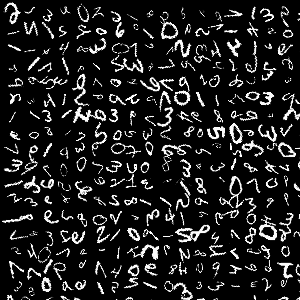

In [10]:
product.generate()

---